<a href="https://colab.research.google.com/github/MirzaYsf/mlops-scoring/blob/test/test_original_code_LightGBM_add_metrics_%2B_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install joblib

In [ ]:
!pip install "dask[dataframe]"
!pip install mlflow

In [ ]:
!pip install "dask[dataframe]"

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

#ssssstest github

import os

# Define the directory path
dir_path = '/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/'

# List all files in the directory
files = os.listdir(dir_path)

# Print the list of files
for file in files:
    print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
installments_payments.csv
credit_card_balance.csv
bureau.csv
sample_submission.csv
POS_CASH_balance.csv
HomeCredit_columns_description.csv
application_train.csv
previous_application.csv
application_test.csv
bureau_balance.csv
credit score.ipynb
.ipynb_checkpoints
scoring-mlflow.ipynb
mlflow-432413-6dddddfa2874.json
mlflow-432413-2ad20e4f08c6-new.json
scoring_v2.ipynb
git.ipynb
test original code LightGBM - add metrics + mlflow.ipynb


In [ ]:
from google.colab import drive
import mlflow
import os

# Mount your Google Drive
drive.mount('/content/drive')

import os

file_path = '/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/mlflow-432413-2ad20e4f08c6-new.json'

if os.path.exists(file_path):
  print("File exists")
else:
  print("File does not exist")
# Set the environment variable pointing to your JSON key file
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/mlflow-432413-2ad20e4f08c6-new.json'

# Set the MLflow tracking URI and experiment
mlflow.set_tracking_uri("http://34.163.27.123:5000/")
mlflow.set_experiment("Scoring-loan-v4")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File exists


<Experiment: artifact_location='gs://scoring-mlflow-bucket/9', creation_time=1724328747453, experiment_id='9', last_update_time=1724328747453, lifecycle_stage='active', name='Scoring-loan-v4', tags={}>

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 19s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 22s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 12s
Installments payments df shape: (339587, 26)
Process installments payments - done in 23s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 14s
Starting LightGBM. Train shape: (307507, 797), test shape: (48744, 797)


<ipython-input-8-a49e7c014ff8>:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
<ipython-input-8-a49e7c014ff8>:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = pd.to_numeric(test_df[col], errors='coerce')


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.775326	valid_0's binary_logloss: 0.539557
Early stopping, best iteration is:
[3]	valid_0's auc: 0.726255	valid_0's binary_logloss: 0.279028
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.776712	valid_0's binary_logloss: 0.546538
Early stopping, best iteration is:
[3]	valid_0's auc: 0.727863	valid_0's binary_logloss: 0.27375
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.774793	valid_0's binary_logloss: 0.545129
Early stopping, best iteration is:
[3]	valid_0's auc: 0.724251	valid_0's binary_logloss: 0.276777


Registered model 'HomeCredit_LightGBM_baseline_Model' already exists. Creating a new version of this model...
2024/08/23 09:10:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HomeCredit_LightGBM_baseline_Model, version 2
Created version '2' of model 'HomeCredit_LightGBM_baseline_Model'.
2024/08/23 09:10:33 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/23 09:10:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run spiffy-trout-889 at: http://34.163.27.123:5000/#/experiments/9/runs/129b998a51654430bfa9621b43fbcba3.
2024/08/23 09:10:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://34.163.27.123:5000/#/experiments/9.


Completed k-fold LightGBM training with metrics and parameters logged.
Run LightGBM with kfold - done in 196s
Full model run - done in 291s


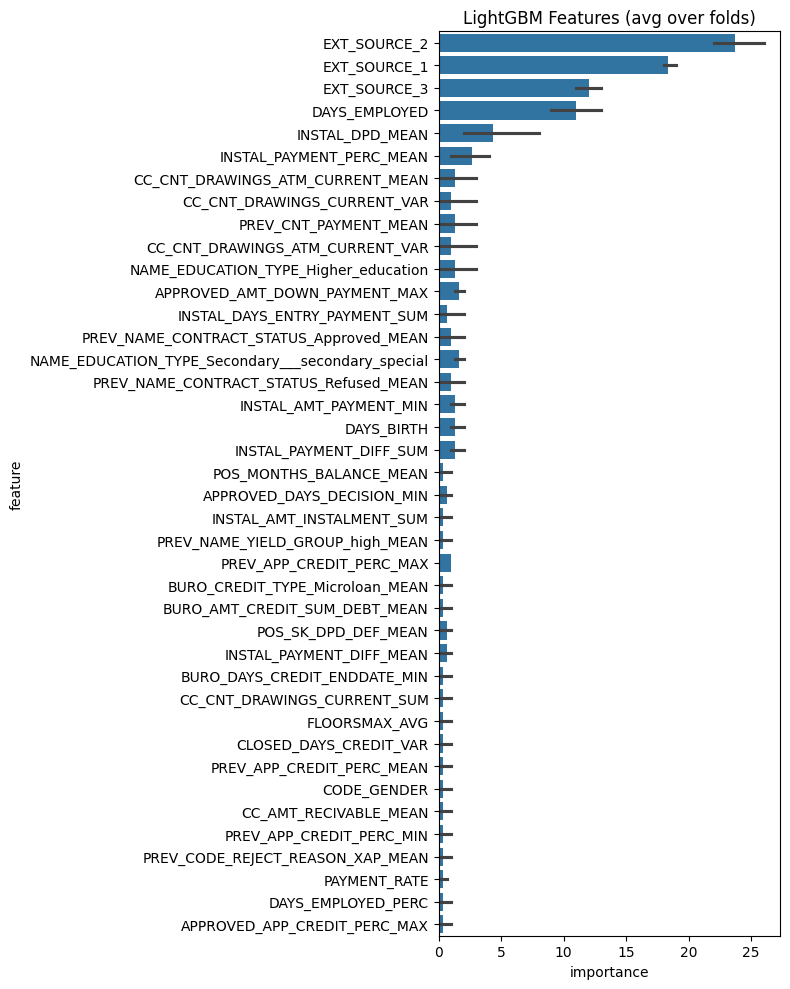

In [ ]:
# HOME CREDIT DEFAULT RISK COMPETITION
# Most features are created by applying min, max, mean, sum and var functions to grouped tables.
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.

# Update 16/06/2018:
# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified)

import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def application_train_test(num_rows=None, nan_as_category=False):
    # Read data and merge
    df = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/application_train.csv', nrows=num_rows)
    test_df = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/application_test.csv', nrows=num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))

    # Use pd.concat instead of append
    df = pd.concat([df, test_df], ignore_index=True)

    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])

    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    del test_df
    gc.collect()

    return df


# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('/content/drive/My Drive/Openclassrooms/mlflow-scoring/home credit/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

from lightgbm import early_stopping, log_evaluation

def clean_column_names(df):
    # Remove or replace special characters in column names
    df.columns = df.columns.str.replace(r'[^\w\s]', '_', regex=True)  # Replace special characters with underscores
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    return df

# Import necessary libraries
import numpy as np
import pandas as pd
import gc
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

# Define the business_cost function
def business_cost(y_true, y_pred, threshold=0.5, fn_cost=10, fp_cost=1):
    """
    Calculate the business cost based on false negatives (FN) and false positives (FP).
    """
    y_pred_binary = (y_pred >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    total_cost = (fn * fn_cost) + (fp * fp_cost)
    return total_cost

# Define the function to find the optimal threshold
def find_optimal_threshold(y_true, y_pred, fn_cost=10, fp_cost=1):
    thresholds = np.linspace(0, 1, 100)
    costs = []

    for threshold in thresholds:
        cost = business_cost(y_true, y_pred, threshold=threshold, fn_cost=fn_cost, fp_cost=fp_cost)
        costs.append(cost)

    optimal_idx = np.argmin(costs)
    return thresholds[optimal_idx], costs[optimal_idx]

import mlflow
import joblib
import gc
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def kfold_lightgbm(df, num_folds, stratified=False, debug=False):
    # Divide the data into training and testing datasets
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]

    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

    # Ensure all columns are numeric
    for col in train_df.columns:
        if train_df[col].dtype == 'object':
            train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
            test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

    del df
    gc.collect()

    # Cross-validation model
    if stratified:
        folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)

    # Arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]

    # Calculate scale_pos_weight based on class imbalance
    scale_pos_weight = len(train_df[train_df['TARGET'] == 0]) / len(train_df[train_df['TARGET'] == 1])

    # Model parameters
    model_params = {
        'nthread': 4,
        'n_estimators': 10000,
        'learning_rate': 0.02,
        'num_leaves': 34,
        'colsample_bytree': 0.9497036,
        'subsample': 0.8715623,
        'max_depth': 8,
        'reg_alpha': 0.041545473,
        'reg_lambda': 0.0735294,
        'scale_pos_weight': scale_pos_weight,
        'min_split_gain': 0.0222415,
        'min_child_weight': 39.3259775,
        'verbosity': -1
    }

    # Lists to store metrics for all folds
    precisions, recalls, f1s, accuracies, aucs, optimal_thresholds, business_costs = [], [], [], [], [], [], []

    # To store the final model from the last fold
    final_model = None

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # Define the LightGBM model
        clf = LGBMClassifier(**model_params)

        # Fit the model
        clf.fit(
            train_x, train_y,
            eval_set=[(valid_x, valid_y)],
            eval_metric='auc',
            callbacks=[early_stopping(stopping_rounds=200), log_evaluation(200)]
        )

        # Predict probabilities on the validation set
        y_pred = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]

        # Find the optimal threshold that minimizes the business cost
        optimal_threshold, min_cost = find_optimal_threshold(valid_y, y_pred, fn_cost=10, fp_cost=1)
        optimal_thresholds.append(optimal_threshold)
        business_costs.append(min_cost)

        # Evaluate model performance at the optimal threshold
        y_pred_optimal = (y_pred >= optimal_threshold).astype(int)

        # Track traditional metrics
        precision = precision_score(valid_y, y_pred_optimal)
        recall = recall_score(valid_y, y_pred_optimal)
        f1 = f1_score(valid_y, y_pred_optimal)
        accuracy = accuracy_score(valid_y, y_pred_optimal)
        auc = roc_auc_score(valid_y, y_pred)

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        accuracies.append(accuracy)
        aucs.append(auc)

        # Store out-of-fold predictions
        oof_preds[valid_idx] = y_pred
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        # Record feature importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        # Save the model from the last fold
        final_model = clf

        # Clean up memory
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    # After the entire cross-validation process, log the average metrics to MLflow
    with mlflow.start_run():
        # Log the model parameters
        mlflow.log_params(model_params)

        # Log average metrics
        mlflow.log_metric("average_precision", np.mean(precisions))
        mlflow.log_metric("average_recall", np.mean(recalls))
        mlflow.log_metric("average_f1", np.mean(f1s))
        mlflow.log_metric("average_accuracy", np.mean(accuracies))
        mlflow.log_metric("average_auc", np.mean(aucs))
        mlflow.log_metric("average_optimal_threshold", np.mean(optimal_thresholds))
        mlflow.log_metric("average_business_cost", np.mean(business_costs))

        # Save and log the final model (from the last fold)
        final_model_filename = "baseline_model.pkl"
        joblib.dump(final_model, final_model_filename)
        mlflow.log_artifact(final_model_filename)

        # Register the model in the MLflow model registry
        mlflow.lightgbm.log_model(lgb_model=final_model, artifact_path="baseline_model", registered_model_name="HomeCredit_LightGBM_baseline_Model")

        # Plot and log feature importance to MLflow
        display_importances(feature_importance_df)

        # Log feature importance plot
        importance_plot_filename = 'lgbm_importances01.png'
        plt.tight_layout()
        plt.savefig(importance_plot_filename)
        mlflow.log_artifact(importance_plot_filename)

    print(f"Completed k-fold LightGBM training with metrics and parameters logged.")

    # Return results for further analysis or submission
    return feature_importance_df, sub_preds


def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]

    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')

    # Save the plot to a file
    importance_plot_filename = 'lgbm_importances01.png'
    plt.tight_layout()
    plt.savefig(importance_plot_filename)

    # Log the feature importance plot as an artifact to MLflow
    mlflow.log_artifact(importance_plot_filename)



def main(debug=False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)

    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()

    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()

    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()

    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()

    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()

    # Clean column names to remove special characters
    df = clean_column_names(df)

    # Now run LightGBM with k-fold cross-validation
    with timer("Run LightGBM with kfold"):
        feat_importance, sub_preds = kfold_lightgbm(df, num_folds=3, stratified=False, debug=debug)

if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        main()
